In [117]:
import numpy as np
import pandas as pd
import keras
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications.xception import preprocess_input
from keras.wrappers.scikit_learn import KerasRegressor

#from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [207]:
def view_mse( history ):
    
    plt.figure(1)
    # summarize history for accuracy
    plt.subplot(211)
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.tight_layout()

In [178]:
def grab_image_1( img_path, target_size=( 60, 40 ), normMethod = 1, printAll = False ):
    img = cv2.imread( img_path, 0 )
    img = cv2.resize( img, target_size )
    img = img.astype('float')
    
    if normMethod == 1:
        img = img / 255.0
    
    elif normMethod == 2:
        img = img - 128
        img = img/128.0
    
    else:
        img = img / 255.0
    
    if printAll:
        print(img.shape)
        print(img[0,0], img[20,20])
        plt.imshow( img )
    
    img = img.flatten()
    img = np.expand_dims(img, axis=0)
    x = preprocess_input(img)
    return x

def get_training_images( n = 10, normMethod = 1, target_size = (60,40), printAll = False ):    
    
    X = np.concatenate([grab_image_1('/home/mbo2d/miscImgs/%s_model.png' % (str(i).zfill(4)) , normMethod=normMethod, target_size=target_size, printAll = printAll) for i in range(n)])
    return X

X = get_training_images( n = 1, normMethod=2 )
print(X.shape)

(1, 2400)


In [111]:
def get_human_scores( n=0, csvLoc = '/home/mbo2d/miscImgs/scores/humanScores.txt' ):
    
    hScores = pd.read_csv( csvLoc, header=None )
    
    Y = hScores[0].values
    #Y = np.expand_dims(Y, axis=0)

    
    if n == 0:
        return Y
    else:
        return Y[:n]


print( get_human_scores(  ) )
print( get_human_scores(  n = 2 ) )


[0.945946 0.941176 0.918919 ... 0.       0.       0.      ]
[0.945946 0.941176]


In [195]:
# single layer regression model
def slr_1( input_shape, printAll = False ):
    
    if printAll:
        print(input_shape)
        print(input_shape[1])
    
    model = keras.Sequential()
    
    model.add( keras.layers.Dense( 1,
        activation='sigmoid',
        input_shape=[input_shape[1]] ) )
    
    model.compile(loss=keras.losses.mean_squared_error,
        optimizer=keras.optimizers.RMSprop(0.001),
        metrics=['mse'] )
    # model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = slr_1( X.shape, printAll = True )
model.summary()

(1000, 2400)
2400
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 1)                 2401      
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


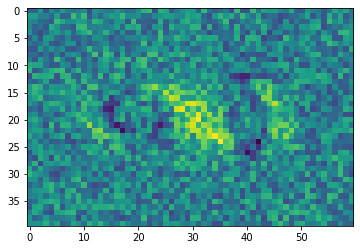

In [232]:
def view_weights( model, saveLoc = None ):

    weights = model.get_weights()[0]
    l1 = weights[:,0]
    l1 = np.reshape( l1, input_size[::-1] )

    plt.imshow(l1)
    plt.show()
    
    if saveLoc != None:
        plt.savefig( saveLoc )
    
view_weights(model)

In [213]:
n = 500
input_size = ( 60, 40 )

X = get_training_images( n=n, target_size = input_size, normMethod=1, printAll = False )
print(X.shape)

Y = get_human_scores( n )
print(Y.shape)

model = slr_1( X.shape )
model.summary()

(500, 2400)
(500,)
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 1)                 2401      
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


Done~


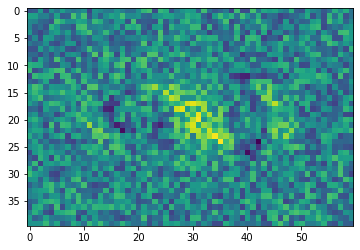

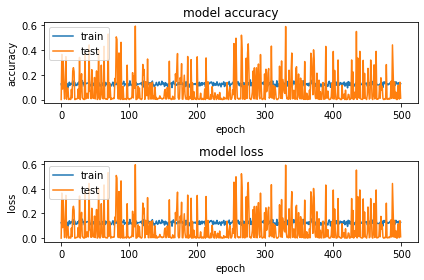

In [227]:
batch_size = 25
epochs = 500
history = model.fit(X, Y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_split = 0.2)

print('Done~')
view_weights(model)
view_mse(history)

0


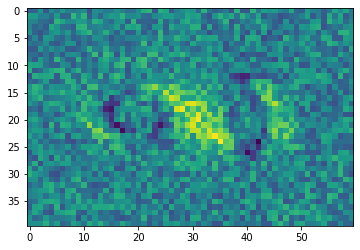

In [ ]:
i = 0
from IPython.display import clear_output

while True:
    batch_size = 25
    epochs = 100
    history = model.fit(X, Y,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,
        validation_split = 0.2)
    
    clear_output(wait=False)
    print(i)
    #view_mse(history)
    view_weights(model, saveLoc='1.png')

<Figure size 432x288 with 0 Axes>